# 1) Краткое описание датасета Heart Disease Prediction UCI

Это основной датасет, используемый для предсказания сердечных заболеваний. Он содержит 14 атрибутов, таких как возраст, пол, уровень холестерина, кровяное давление и другие. В отличие от многих других датасетов, этот содержит метки, показывающие, есть ли у пациента заболевание сердца.

https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci

Аналоги:

Framingham Heart Study - датасет был получен в ходе многолетнего исследования, которое началось в 1948 году и направлено на изучение факторов риска сердечно-сосудистых заболеваний. Он содержит подробные данные о здоровье участников, включая факторы риска, такие как курение, уровень холестерина, артериальное давление и возраст.

Pima Indians Diabetes Database - этот датасет фокусируется на прогнозировании диабета среди индейцев Пима, однако он также может быть полезен для построения моделей классификации заболеваний, так как включает разнообразные биометрические показатели, такие как уровень глюкозы, давление и индекс массы тела, которые могут быть связаны с сердечно-сосудистыми рисками.


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Загрузка датасета Heart Disease UCI
# tvicer  15318056
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/heart-disease.csv"
# dataset = 'https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data'
dataset = 'https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci'
od.download(dataset)

Skipping, found downloaded files in "./heart-disease-prediction-uci" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/heart-disease-prediction-uci/heart.csv')

# 2) Статистика

In [ ]:
# Просмотр первых нескольких строк данных
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


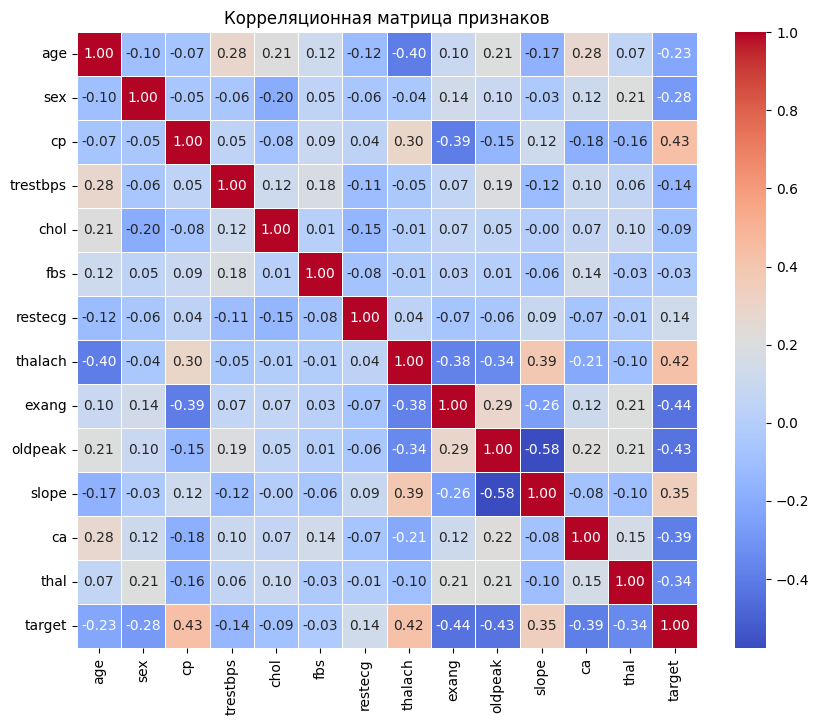

In [ ]:
# Рассчитаем корреляцию между признаками
corr = df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()


In [ ]:
# Проверим на пропущенные значения
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


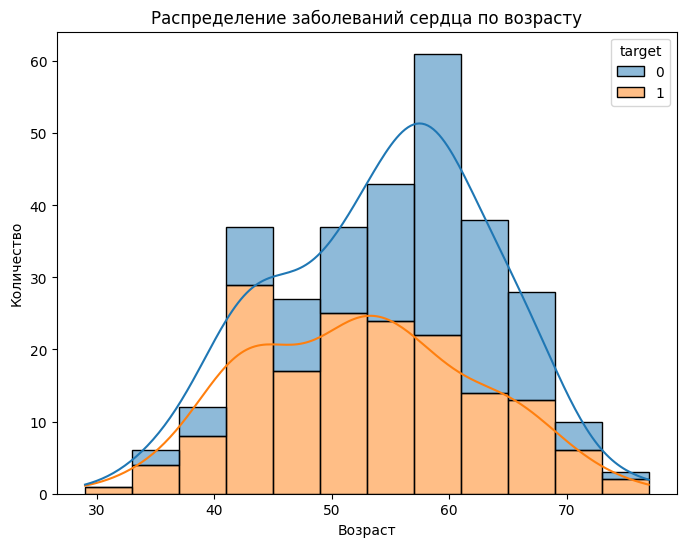

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения заболеваний по возрасту
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', kde=True)
plt.title('Распределение заболеваний сердца по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()


# 3) Алгоритм
Построим модель для предсказания заболевания сердца. Используем логистическую регрессию или случайный лес.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Разделим данные на обучающую и тестовую выборки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим модель случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Сделаем предсказания
y_pred = rf.predict(X_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 82.42%


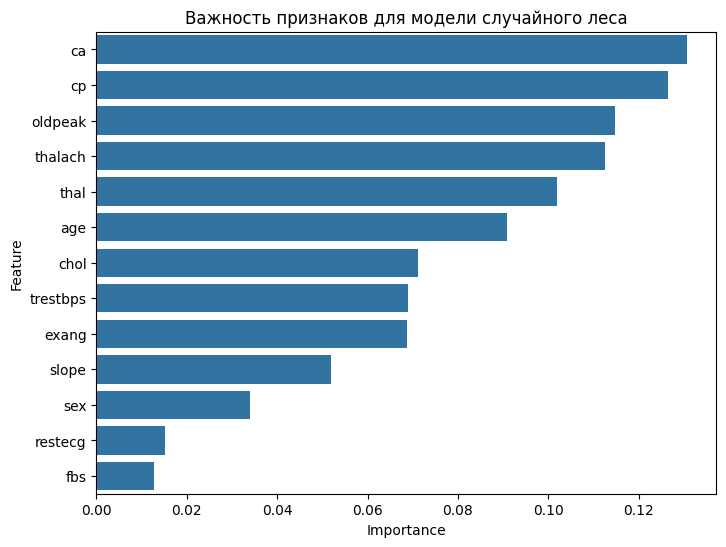

In [ ]:
# Важность признаков
feature_importances = rf.feature_importances_

# Выводим важность признаков
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признаков для модели случайного леса')
plt.show()


# 4) Классификация и понижение размерности

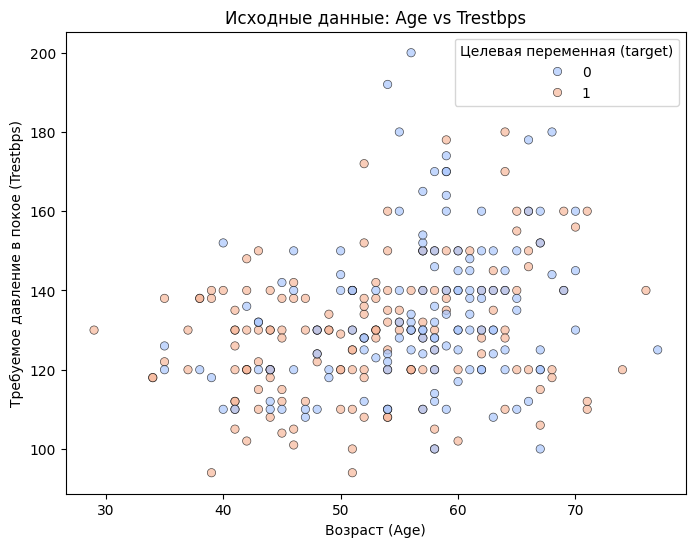

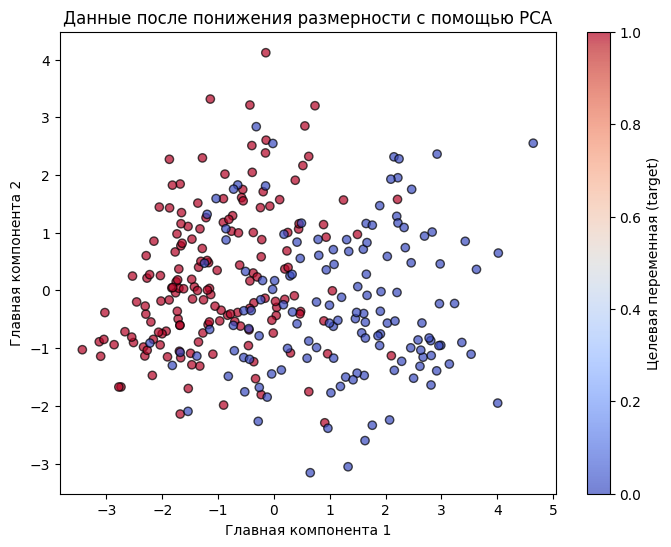

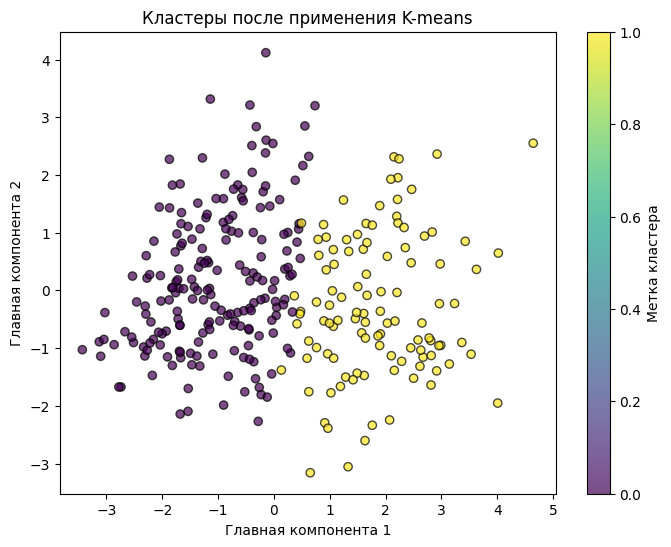

Средний силуэтный коэффициент: 0.17


In [ ]:
# Импортируем необходимые библиотеки для понижения размерности и кластеризации
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Стандартизируем данные перед применением PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация данных до понижения размерности
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['age'], y=X['trestbps'], hue=y, palette='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Исходные данные: Age vs Trestbps')
plt.xlabel('Возраст (Age)')
plt.ylabel('Требуемое давление в покое (Trestbps)')
plt.legend(title='Целевая переменная (target)')
plt.show()

# Шаг 1: Понижение размерности с использованием PCA
pca = PCA(n_components=2)  # Уменьшаем до 2D для визуализации
X_pca = pca.fit_transform(X_scaled)

# Визуализация данных после понижения размерности
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Данные после понижения размерности с помощью PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Целевая переменная (target)')
plt.show()

# Шаг 2: Кластеризация с использованием K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # Кластеризуем на 2 кластера (так как у нас бинарная целевая переменная)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Кластеры после применения K-means')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Метка кластера')
plt.show()

# Шаг 3: Оценка качества кластеризации
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Средний силуэтный коэффициент: {silhouette_avg:.2f}")


# 5) Выбросы (Outliers)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# 1) Используем межквартильный размах (IQR) для поиска выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Определим выбросы как те значения, которые выходят за пределы: Q1 - 1.5 * IQR и Q3 + 1.5 * IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Печатаем количество выбросов по каждому признаку
outlier_counts = outliers.sum()
print("Количество выбросов по каждому признаку (с использованием IQR):")
print(outlier_counts)

# 2) Использование Z-оценки для поиска выбросов
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Вычисление Z-оценки для числовых признаков
outliers_zscore = (z_scores > 3).sum(axis=0)  # Выбросы, если Z-оценка больше 3
print("\nКоличество выбросов по каждому признаку (с использованием Z-оценки):")
print(outliers_zscore)



Количество выбросов по каждому признаку (с использованием IQR):
age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64

Количество выбросов по каждому признаку (с использованием Z-оценки):
age         0
sex         0
cp          0
trestbps    2
chol        4
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     2
slope       0
ca          5
thal        2
target      0
dtype: int64


# 6) Применение в продакшене

Этот датасет может использоваться для разработки моделей, предсказывающих наличие сердечно-сосудистых заболеваний на основе различных клинических признаков. Например, врачи могут использовать такие модели для оценки риска заболевания у пациентов на ранних стадиях во время прохождения ежегодного чекапа.
Также данный датасет может быть использован для анализа того, какие признаки сильнее всего влияют на риск возникновения сердечных заболеваний. Эти данные могут помочь в создании рекомендаций по снижению риска возникновения заболеваний.

Недостатки датасета:

1) Отсутствие временных данных - история болезни, изменение состояния пациента во времени и т.д.

2) Низкая размерность

3) Отсутствие информации о других факторах риска - психоэмоциональное состояние пациента или наличие хронических заболеваний может сильно влиять на риск сердечно-сосудистых заболеваний
